<a href="https://colab.research.google.com/github/Scsant/Inclui-placas/blob/main/secondMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd

In [63]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [64]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [65]:
x = dados.drop('inadimplente', axis= 1)
y = dados['inadimplente']

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [68]:
print(f'Acuracia: {modelo.score(x, y)}')

Acuracia: 1.0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state= 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify= y, random_state=5)


In [71]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acuracua de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acuracia de validação: {modelo.score(x_val, y_val)}')

Acuracua de treino: 0.9205865272938444
Acuracia de validação: 0.9058444386377493


In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [73]:

y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10359   120]
 [  961    41]]


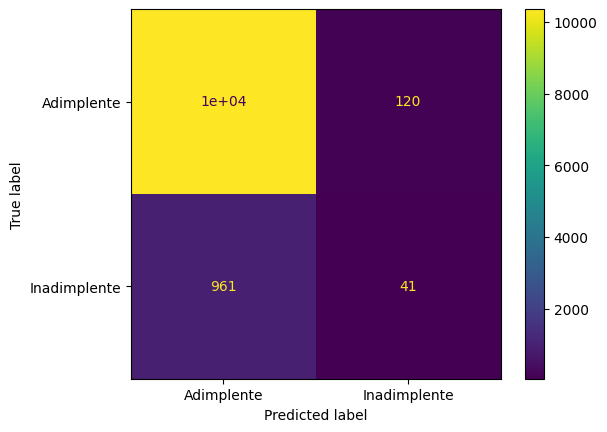

In [74]:

visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();


In [75]:
from sklearn.metrics import accuracy_score
# Calcular acurácia
acuracia = accuracy_score(y_val, y_previsto)
print(f'Acurácia: {acuracia}')




Acurácia: 0.9058444386377493


In [76]:
from sklearn.metrics import precision_score, recall_score

In [77]:
# Calcular precisão, recall e F1-score
precisao = precision_score(y_val, y_previsto)
recall = recall_score(y_val, y_previsto)


print(f'Precisão: {precisao}')
print(f'Recall: {recall}')

Precisão: 0.2546583850931677
Recall: 0.04091816367265469


In [78]:
from sklearn.metrics import f1_score

In [79]:
f1 = f1_score(y_val, y_previsto)
print(f'F1-Score: {f1}')

F1-Score: 0.07050730868443679


In [80]:
from sklearn.metrics import RocCurveDisplay

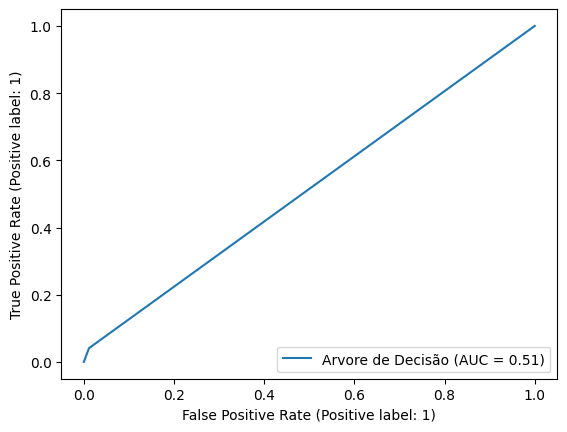

In [81]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Arvore de Decisão');

In [82]:
from sklearn.metrics import roc_auc_score


In [83]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')


AUC: 0.5147333446476644


In [84]:
from sklearn.metrics import PrecisionRecallDisplay


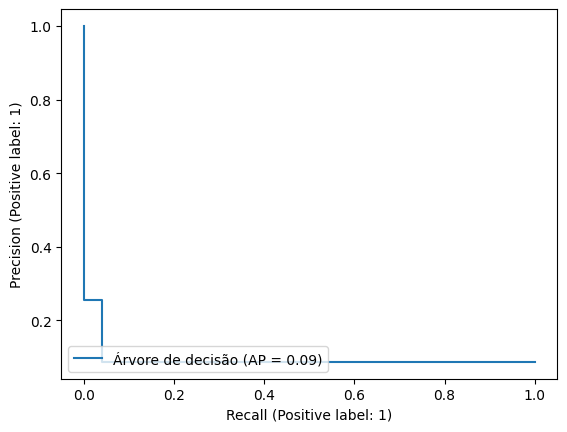

In [85]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');


In [86]:
from sklearn.metrics import average_precision_score
print(f'AP: {average_precision_score(y_val, y_previsto)}')


AP: 0.09412366362905589


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_previsto))



              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [88]:
from sklearn.model_selection import cross_validate, KFold
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)


In [89]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados


{'fit_time': array([0.24247074, 0.21887445, 0.22780824, 0.22498012, 0.21381927]),
 'score_time': array([0.00495386, 0.00519085, 0.00529909, 0.00445557, 0.00416136]),
 'test_score': array([0.91311922, 0.90755662, 0.90712108, 0.9135453 , 0.89960801])}

In [90]:
cv_resultados['test_score']


array([0.91311922, 0.90755662, 0.90712108, 0.9135453 , 0.89960801])

In [91]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


Intervalo de confiança: [0.8980640149783725, 0.9183160756481037]


In [92]:
def intervalo_conf():
    media = cv_resultados['test_score'].mean()
    desvio_padrao = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


In [93]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


In [94]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados


{'fit_time': array([0.21732664, 0.22335005, 0.21256948, 0.22220254, 0.21647716]),
 'score_time': array([0.00808787, 0.00759864, 0.00736165, 0.00714159, 0.00731421]),
 'test_score': array([0.02906209, 0.01856436, 0.01845018, 0.01697128, 0.02427746])}

In [95]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados


{'fit_time': array([0.22369599, 0.22971964, 0.22798347, 0.22497392, 0.21309447]),
 'score_time': array([0.01859021, 0.01877332, 0.01882744, 0.01897669, 0.01746511]),
 'test_accuracy': array([0.91322809, 0.90733885, 0.90766551, 0.91376307, 0.89928136]),
 'test_recall': array([0.02509908, 0.0210396 , 0.0196802 , 0.01697128, 0.02543353]),
 'test_precision': array([0.24358974, 0.22077922, 0.23880597, 0.25      , 0.21153846]),
 'test_f1': array([0.04550898, 0.03841808, 0.03636364, 0.03178484, 0.04540764])}

In [119]:
def intervalo_conf():
    media = cv_resultados['test_score'].mean()
    desvio_padrao = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


In [120]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')



In [121]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados


{'fit_time': array([0.21262813, 0.21933389, 0.22181988, 0.20927596, 0.21093869]),
 'score_time': array([0.00736547, 0.00779986, 0.00748253, 0.00714755, 0.00733352]),
 'test_score': array([0.02377807, 0.01980198, 0.01845018, 0.01827676, 0.02427746])}

In [122]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.01571860665101793, 0.026115175382408644]


In [123]:
dados['inadimplente'].value_counts(normalize = True)


inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [114]:
from sklearn.model_selection import StratifiedKFold


In [115]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')


In [116]:
cv_resultados


{'fit_time': array([0.23144603, 0.21473622, 0.2245698 , 0.21992564, 0.20571518]),
 'score_time': array([0.00835729, 0.00815082, 0.0081284 , 0.00760317, 0.00714278]),
 'test_score': array([0.03366584, 0.02871411, 0.0286783 , 0.02369077, 0.02618454])}

In [124]:
intervalo_conf(cv_resultados)




Intervalo de confiança: [0.01571860665101793, 0.026115175382408644]


In [101]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')


In [102]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

In [103]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')


Intervalo de confiança (Decision Tree): [0.9025478639707798, 0.9228478108593472]
Intervalo de confiança (Random Forest): [0.9025478639707798, 0.9228478108593472]


In [52]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier


In [ ]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}')


In [54]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


In [ ]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}')


In [126]:
from imblearn.over_sampling import SMOTE


In [127]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)


In [128]:
y_balanceado.value_counts(normalize = True)


inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [129]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')


In [130]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.7167635899381778, 0.760999245637667]


In [132]:
from imblearn.pipeline import Pipeline as imbpipeline


In [133]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])



In [134]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')


In [135]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.1963066340627935, 0.29158350326554616]


In [136]:
from imblearn.under_sampling import NearMiss


In [137]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])


In [138]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')


In [139]:
intervalo_conf(cv_resultados)


Intervalo de confiança: [0.6248824549508344, 0.6966283747165701]


In [140]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)


In [141]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)


              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



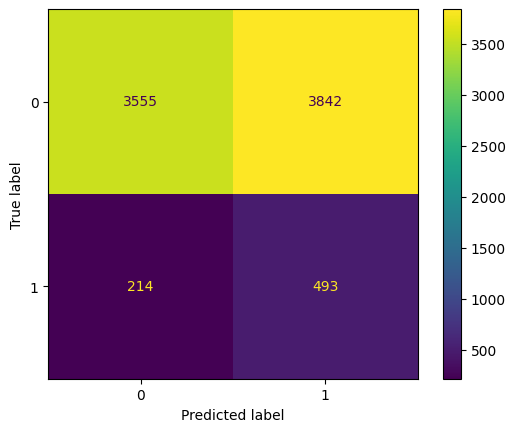

In [143]:
print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);


In [144]:
from imblearn.combine import SMOTEENN

In [145]:
modelo = DecisionTreeClassifier(max_depth= 10)
pipeline = imbpipeline([('smoteen', SMOTEENN()), ('arvore', modelo)])

In [146]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')
intervalo_conf(cv_resultados)



Intervalo de confiança: [0.3081884487981029, 0.4196698081811717]
